In [1]:
#IMPORT THE REQUIRED LIBRARIES

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans #implementation of the kmeans or clustering algorithm

In [2]:
#LOAD FILE WITH DATA AND DISPLAY IT

data = pd.read_csv('/content/Mall_Customers.csv')
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#SELECT THE ANNUAL INCOME AND SPENDING SCORE COLUMNS AS THE FEATURES FOR CLUSTERING
#CREATING A SUBSET FROM THE ORIGINAL DATAFRAME

x = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [4]:
#DETERMINING THE OPTIMAL NUMBER OF CLUSTERS (ELBOW METHOD)

inertia = [] #List to store the inertia of the fitted kmeans models
k_values = range(1, 11) #Range of k values to test

#Perform a for loop to fit a kmeans model for each value of k and store the inertia
#Inertia measures the sum of squared distances between each point and the centroid of its cluster

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

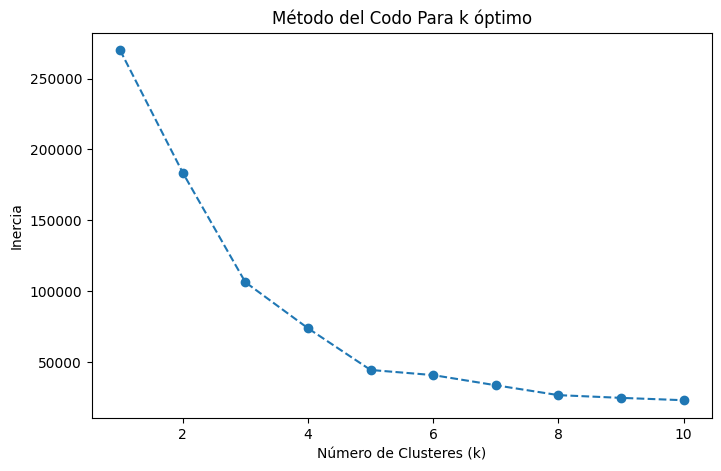

In [5]:
#PLOT THE ELBOW METHOD
#The elbow in the curve indicates the optimal number of clusters (k)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title('Método del Codo Para k óptimo')
plt.xlabel('Número de Clusteres (k)')
plt.ylabel('Inercia')
plt.show()

In [6]:
#APPLICATION OF THE KMEANS ALGORITHM WITH K=5

kmeans = KMeans(n_clusters=5, random_state=42) #5 is chosen as the number of clusters based on the elbow method
clusters = kmeans.fit_predict(x) #fit the model and assign a cluster to each customer

#ADD THE ASSIGNED CLUSTER TO THE ORIGINAL DATAFRAME

data['Cluster'] = clusters #The Cluster column is added to the original dataframe to indicate which cluster each customer belongs to


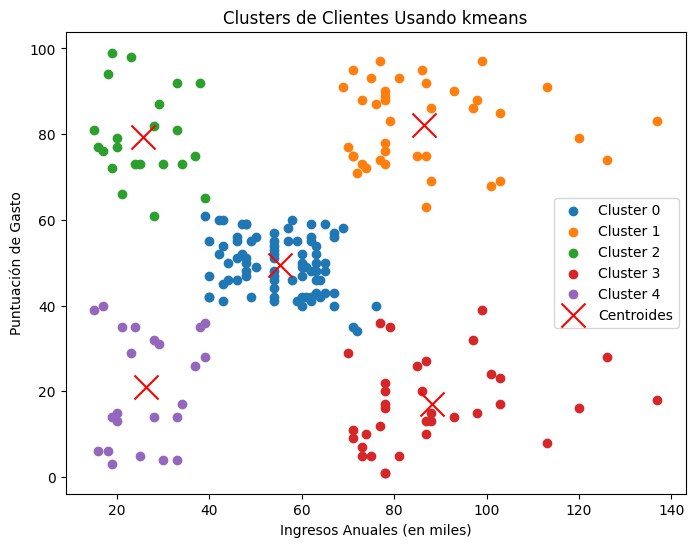

In [7]:
#PLOT THE CLUSTERS

plt.figure(figsize=(8, 6))
for cluster in range(5):
    cluster_data = x[clusters == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], label=f'Cluster {cluster}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centroides')
plt.title('Clusters de Clientes Usando kmeans')
plt.xlabel('Ingresos Anuales (en miles)')
plt.ylabel('Puntuación de Gasto')
plt.legend()
plt.show()

In [8]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


In [9]:
#DOWNLOAD AN EXCEL FILE CONTAINING ALL CUSTOMERS WITH THEIR ASSIGNED CLUSTER

from google.colab import files
data.to_excel('kmeans_data.xlsx', index=False)
files.download('kmeans_data.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>